In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random

In [2]:
# Load dataset 
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

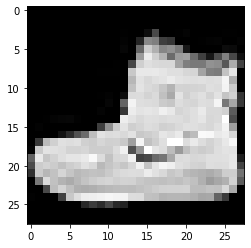

In [4]:
# Visualize a sample image
plt.imshow(x_train[0],cmap = 'gray')

In [5]:
# check out the shape of the training data
x_train.shape

(60000, 28, 28)

In [7]:
# check out the shape of the testing data
x_test.shape


(10000, 28, 28)

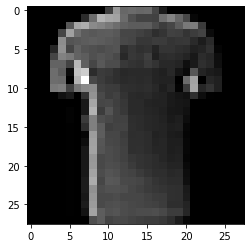

In [11]:
# Let's view some images!
i = random.randint(1,60000)
plt.imshow(x_train[i],cmap='gray')

In [13]:
label = y_train[i]
label

0

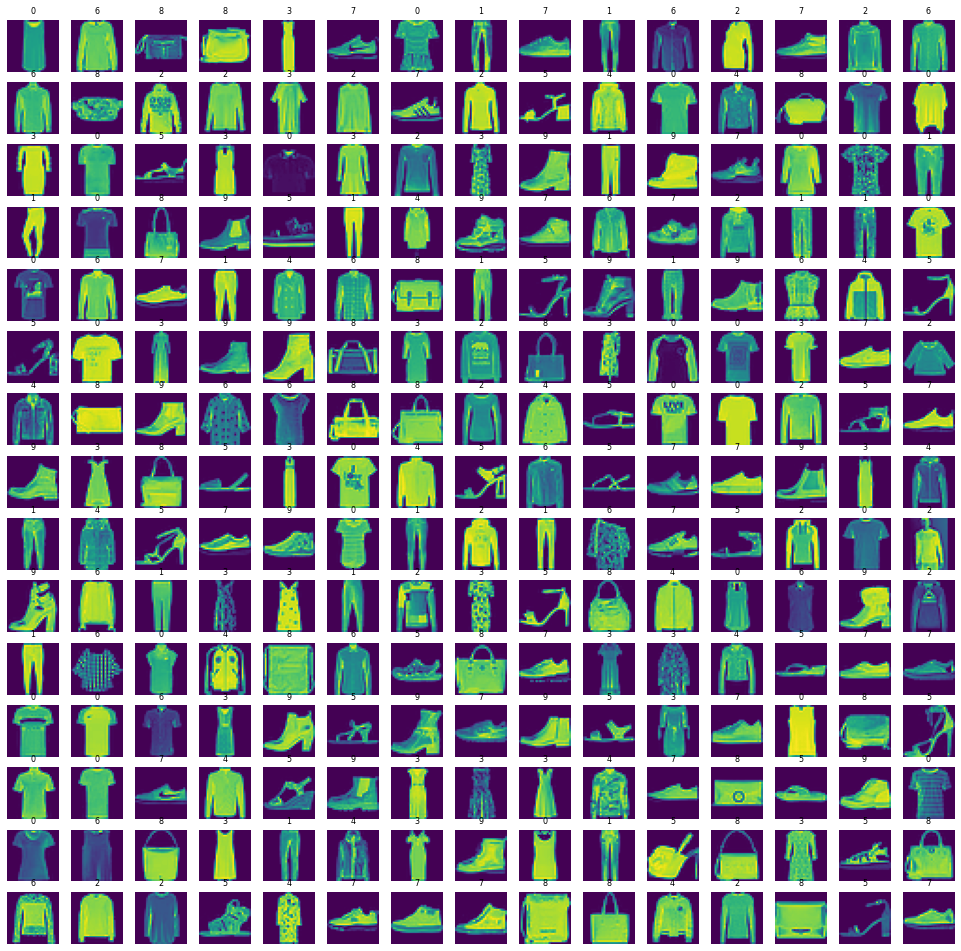

In [15]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(x_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0,W_grid*L_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index],fontsize = 8)
    axes[i].axis('off')


In [16]:
# normalize data
x_train = x_train/255
x_test = x_test/255

In [27]:
# add some noise
noise_factor = 0.3
noise_dataset =[]
for img in x_train:
    noisy_image = img + noise_factor*np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image,0,1)
    noise_dataset.append(noisy_image)
noise_dataset = np.array(noise_dataset)

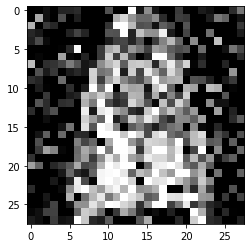

In [28]:
plt.imshow(noise_dataset[22],cmap = 'gray')

In [30]:
# add noise to testing dataset
noise_factor = 0.3
noise_test_dataset =[]
for img in x_test:
    noisy_image = img + noise_factor*np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image,0,1)
    noise_test_dataset.append(noisy_image)
noise_test_dataset= np.array(noise_test_dataset)

In [31]:
autoencoder = tf.keras.models.Sequential()
#encoder
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3,strides = 2,padding = 'same',
                                       input_shape = (28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3,strides = 2,padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3,strides = 1,padding = 'same'))
#decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = 3,strides = 2,padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = 3,strides = 2,
                                                activation = 'sigmoid',
                                                padding = 'same'))


In [32]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [33]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
               x_train.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (noise_test_dataset.reshape(-1, 28, 28, 1),
                                  x_test.reshape(-1, 28, 28, 1)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 34s 568us/sample - loss: 0.3992 - val_loss: 0.3281
Epoch 2/10
60000/60000 [==============================] - 28s 473us/sample - loss: 0.3179 - val_loss: 0.3151
Epoch 3/10
60000/60000 [==============================] - 28s 472us/sample - loss: 0.3104 - val_loss: 0.3105
Epoch 4/10
60000/60000 [==============================] - 29s 480us/sample - loss: 0.3064 - val_loss: 0.3074
Epoch 5/10
60000/60000 [==============================] - 29s 488us/sample - loss: 0.3041 - val_loss: 0.3056
Epoch 6/10
60000/60000 [==============================] - 29s 488us/sample - loss: 0.3028 - val_loss: 0.3045
Epoch 7/10
60000/60000 [==============================] - 30s 492us/sample - loss: 0.3020 - val_loss: 0.3040
Epoch 8/10
60000/60000 [==============================] - 30s 493us/sample - loss: 0.3014 - val_loss: 0.3033
Epoch 9/10
60000/60000 [==============================] - 29s 485us/sample - l

In [35]:
evaluation = autoencoder.evaluate(noise_test_dataset.reshape(-1,28,28,1),x_test.reshape(-1,28,28,1))
print('Test Loss: {:.3f}'.format(evaluation))

10000/10000 [==============================] - 2s 232us/sample - loss: 0.3026
Test Loss: 0.303


In [36]:
predicted = autoencoder.predict(noise_dataset[:10].reshape(-1,28,28,1))

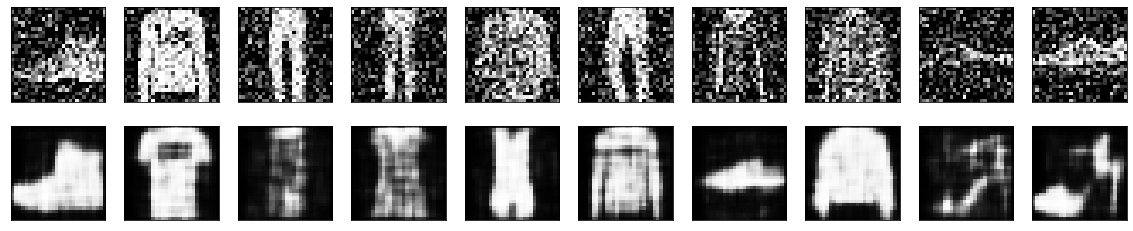

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_dataset[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

- 0 = T-shirt/top
- 1 = Trouser
- 2 = Pullover
- 3 = Dress
- 4 = Coat
- 5 = Sandal
- 6 = Shirt
- 7 = Sneaker
- 8 = Bag
- 9 = Ankle boot